# Modelado del texto 


## 1. Preprocesamiento del texto
### El preprocesamiento del texto consiste en curar los datos para la vectorización. Sin embargo, depende del dominio del problema.
### Entre las actividades más comunes se tienen:
- #### Remover acentos, números, símbolos duplicados  y símbolos raros
- #### Convertir a minúsculas
- #### Obtener unigramas, bigramas, trigramas de ***palabras***,  etc. 
- #### Obtener unigramas, bigramas, trigramas de ***caracteres***,  etc.

# 1.0 Lectura de archivos

In [1]:
# Lectura de archivos  TXT
with open('./data/text_1.txt', 'r', encoding='utf-8') as archivo:
    for linea in archivo:
        print(linea.strip())  # Usamos strip() para quitar el salto de línea al final

El hereje rebelde
En el verde césped del edén, célebre sede de creyentes, el decente Efrén se estremece. Tres deberes del mes lee en el templete del regente: «Defender el vergel del Hereje Rebelde, tener fe en el celeste Jefe de tez perenne, ser excelente». El membrete del Jefe es esplendente, se ve de kermés. Esther se embellece enfrente de Efrén: es de temple terrestre, cree levemente en el deber, el degenere en vez de repelerle le vence. Se ven brevemente, temen se decrete el envejecer, se envenene el éter, se cercene gente, se eleve el jerez. Desde el estrés del Jefe el edén decrece, el excedente le pertenece, se ejercen leyes dementes, se debe beber detergente en vez de leche, ser pelele, ser pedestre, ser deferente; es menester entretenerse en tejer redes, en prender rebeldes. En el Este, trece rehenes perecen de sed; en el frente fenecen de herpes, de peste. El edén se ennegrece, se pretende reprender herejes, perderles.
—¡Eh, Esther, ven!, relee el deber. El Jefe se e

In [2]:
# Lectura de archivos en formato JSON

import pandas as pd
d = pd.read_json("./data/text_3.json", lines=True)
d.head(10)

,created_at,id,text
0,2020-03-29 06:16:55+00:00,1244146499111374849,"Ya nos pusimos al pedo mi vecina y yo, y pasar..."
1,2020-03-21 05:28:06+00:00,1241235112848752641,Extraño los juegos de Jak and Daxter.
2,2020-03-24 23:50:56+00:00,1242599813520162819,Carajo!
3,2020-03-23 01:43:20+00:00,1241903323369758720,@jrodolfoazul97 @ismeraipons Si estaba muy bue...
4,2020-03-13 17:39:28+00:00,1238520062178459648,"@OdiliaRomero Si verdad, llévame a viajar por ..."
5,2020-03-21 14:46:02+00:00,1241375522413838344,@Cartoo ¡JaJaJa! Yo la vi toda 🤦🏻‍♂️
6,2020-03-25 06:01:39+00:00,1242693106937540609,"Pinches gatos presumido arriba del techo, esta..."
7,2020-03-09 04:10:20+00:00,1236866887541284864,@Chucho_MTY Ya voy para ajuera con Chester y E...
8,2020-03-17 17:43:37+00:00,1239970661465915392,@ElUberTigre JAJAJAJAJAJAJAJA
9,2020-03-19 19:17:24+00:00,1240719038902231041,@AlexisjRamirezp No lo voy a ver por que ya no...


In [3]:
# acceder a los datos del Frame

d["text"][300]

'Lobitto 🐺🤭 que calor https://t.co/SAs33uE1Bw'

In [4]:
#Convertirlos en una lista

list (d["text"])

['Ya nos pusimos al pedo mi vecina y yo, y pasaremos la información a los demás y a nuestros roomies, y decidimos cam… https://t.co/bve6gkk4yf',
 'Extraño los juegos de Jak and Daxter.',
 'Carajo!',
 '@jrodolfoazul97 @ismeraipons Si estaba muy bueno, muchas gracias bro',
 '@OdiliaRomero Si verdad, llévame a viajar por Estados Unidos contigo para que se me quite la fantasía.',
 '@Cartoo ¡JaJaJa! Yo la vi toda 🤦🏻\u200d♂️',
 'Pinches gatos presumido arriba del techo, estamos en cuarentena putos :(',
 '@Chucho_MTY Ya voy para ajuera con Chester y Estopita',
 '@ElUberTigre JAJAJAJAJAJAJAJA',
 '@AlexisjRamirezp No lo voy a ver por que ya no quiero enojarme más...',
 '@V_TrujilloM @lopezobrador_ Ya déjenlo están llenos odio solo por que les quito la mano que les daba de tragar',
 '@DevilCronos @FaustoLucifer Tú, con gorra.',
 'Amigos ya hice el ejercicio de hoy.\n\nBike one hour!!',
 'Te odio @nhhotelgroup 😖',
 '@isaBonhamC Me los hago por ti dd ☺️',
 'Mi tipo de persona 🍷🍷🍷',
 'Es gratifican

# 1.1 Normalización del texto
- Eliminar acentos
- Eliminar duplicados
- Eliminar puntuación
- mantiene solo un espacio entre los tokens

In [5]:
# Normalización del texto

import unicodedata
import re
PUNCTUACTION = ";:,.\\-\"'/"
SYMBOLS = "()[]¿?¡!{}~<>|"
NUMBERS= "0123456789"
SKIP_SYMBOLS = set(PUNCTUACTION + SYMBOLS)
SKIP_SYMBOLS_AND_SPACES = set(PUNCTUACTION + SYMBOLS + '\t\n\r ')

def normaliza_texto(input_str,
                    punct=False,
                    accents=False,
                    num=False,
                    max_dup=2):
    """
        punct=False (elimina la puntuación, True deja intacta la puntuación)
        accents=False (elimina los acentos, True deja intactos los acentos)
        num= False (elimina los números, True deja intactos los acentos)
        max_dup=2 (número máximo de símbolos duplicados de forma consecutiva, rrrrr => rr)
    """
    
    nfkd_f = unicodedata.normalize('NFKD', input_str)
    n_str = []
    c_prev = ''
    cc_prev = 0
    for c in nfkd_f:
        if not num:
            if c in NUMBERS:
                continue
        if not punct:
            if c in SKIP_SYMBOLS:
                continue
        if not accents and unicodedata.combining(c):
            continue
        if c_prev == c:
            cc_prev += 1
            if cc_prev >= max_dup:
                continue
        else:
            cc_prev = 0
        n_str.append(c)
        c_prev = c
    texto = unicodedata.normalize('NFKD', "".join(n_str))
    texto = re.sub(r'(\s)+', r' ', texto.strip(), flags=re.IGNORECASE)
    return texto



In [6]:
# Normaliza el texto 
# no hace la separación de tokens si están unidos por un símbolo o signo de puntuación. Realizar un proceso combinado, p. e., tokenización y normalizado 

texto = "En Broadway, a la altura de la calle 113, no sólo se habla en un español nasal y contaminado;también podría decirse que se piensa, se camina y se come en español"

print(f"Texto original: \n\t{texto}\n")
texto_nuevo = normaliza_texto(texto)

#Algunas palabras se juntan "contaminadotambien"

print(texto_nuevo)

texto_nuevo = normaliza_texto(texto, num=True)

#Algunas palabras se juntan "contaminadotambien"

print(texto_nuevo)



Texto original: 
	En Broadway, a la altura de la calle 113, no sólo se habla en un español nasal y contaminado;también podría decirse que se piensa, se camina y se come en español

En Broadway a la altura de la calle no solo se habla en un espanol nasal y contaminadotambien podria decirse que se piensa se camina y se come en espanol
En Broadway a la altura de la calle 113 no solo se habla en un espanol nasal y contaminadotambien podria decirse que se piensa se camina y se come en espanol


# Ejercicio:
- ### Normalizar el texto del archivo text_1.txt que se encuentra en la carpeta "data" 


In [7]:
# TODO. Aplicar la normalización de texto a los datos del archivo "text_1.txt"

# 1.2 Tokenización: Obtener las oraciones o  tokens del texto 

## Instalando datos de NLTK

In [8]:
#instalando los modelos, incluidos el español

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Separación de las oraciones del texto

In [9]:
## Cargar el tokenizador de oraciones para el español

tokenizador_oraciones = nltk.data.load('tokenizers/punkt/spanish.pickle')

In [10]:
texto = "De los cerros altos del sur, el de Luvina es el más alto y el más pedregoso. Está plagado de esa piedra gris con la que hacen la cal, pero en Luvina no hacen cal con ella" \
        " ni le sacan ningún provecho. Allí la llaman piedra cruda, y la loma que sube hacia Luvina la nombran Cuesta de la Piedra Cruda. El aire y el sol se han encargado de desmenuzarla," \
        " de modo que la tierra de por allí es blanca y brillante como si estuviera rociada siempre por el rocío del amanecer; aunque esto es un puro decir, porque en Luvina los días son tan" \
        " fríos como las noches y el rocío se cuaja en el cielo antes que llegue a caer sobre la tierra."

tokenizador_oraciones = nltk.data.load('tokenizers/punkt/spanish.pickle')
oraciones = tokenizador_oraciones.tokenize(texto)
print(oraciones)


['De los cerros altos del sur, el de Luvina es el más alto y el más pedregoso.', 'Está plagado de esa piedra gris con la que hacen la cal, pero en Luvina no hacen cal con ella ni le sacan ningún provecho.', 'Allí la llaman piedra cruda, y la loma que sube hacia Luvina la nombran Cuesta de la Piedra Cruda.', 'El aire y el sol se han encargado de desmenuzarla, de modo que la tierra de por allí es blanca y brillante como si estuviera rociada siempre por el rocío del amanecer; aunque esto es un puro decir, porque en Luvina los días son tan fríos como las noches y el rocío se cuaja en el cielo antes que llegue a caer sobre la tierra.']


## Tokenizar: Obtener los tokens del texto 

In [11]:
from  nltk import word_tokenize

texto = "De los cerros altos del sur, el de Luvina es el más alto y el más pedregoso."

tokens = word_tokenize(texto)
print(tokens)

['De', 'los', 'cerros', 'altos', 'del', 'sur', ',', 'el', 'de', 'Luvina', 'es', 'el', 'más', 'alto', 'y', 'el', 'más', 'pedregoso', '.']


# 1.3 Obtención de características para el clasificador

# N-Gramas


### 1-gramas o Unigramas

- #### Un **unigrama** (puede ser unigrama de palabras o caracteres) es la unidad más básica dentro del análisis de texto en lingüística computacional y procesamiento del lenguaje natural (NLP). 
- #### Consiste en una única palabra o elemento dentro de una secuencia de texto. 
- #### Los unigramas se enfocan en el análisis palabra por palabra de forma individual.
- #### Los unigramas suelen ser útiles en tareas como la clasificación de texto, el análisis de frecuencias de palabras y la identificación de temas clave dentro de un texto.


Por ejemplo, si tomamos el texto:  

**"De los cerros altos del sur el de Luvina es el más alto"**

Los unigramas serían simplemente cada una de las palabras individuales:

1. *De*
2. *los*
3. *cerros*
4. *altos*
5. *del*
6. *sur*
7. *el*
8. *de*
9. *Luvina*
10. *es*
11. *el*
12. *más*
13. *alto*



In [12]:
from  nltk import word_tokenize

texto = "De los cerros altos del sur el de Luvina es el más alto"

tokens = word_tokenize(texto)
print(tokens)

['De', 'los', 'cerros', 'altos', 'del', 'sur', 'el', 'de', 'Luvina', 'es', 'el', 'más', 'alto']


# Ejercicio: 

- ## Dado el texto "texto1":
    -  ### Extraer las oraciones
    -  ### Extraer las lista de tokens para cada oración

```python

texto1 = "San Juan Luvina. Me sonaba a nombre de cielo aquel nombre. Pero aquello es el purgatorio. Un lugar moribundo donde se han muerto hasta los perros y ya no hay ni quien le ladre al silencio; pues en cuanto uno se acostumbra al vendaval que allí sopla, no se oye sino el silencio que hay en todas las soledades. Y eso acaba con uno. Míreme a mí. Conmigo acabó. Usted que va para allá comprenderá pronto lo que le digo."
```



In [13]:
# TODO:  Procesar el texto1: separar las oraciones y extraer la lista  de tokens.

In [14]:

# TODO: Procesar el texto1: separar las oraciones y extraer la lista  de tokens, normalizar el texto y  NO incluir los signos de puntuación.


### 2-gramas o Bigramas
Un bigrama es una secuencia de dos elementos contiguos dentro de un texto. Estos elementos pueden ser palabras, caracteres o unidades fonéticas, dependiendo del tipo de análisis que se realice. En el caso del análisis de texto, los bigramas más comunes son los formados por palabras consecutivas.

Cada bigrama refleja la transición entre dos palabras dentro de la oración, y su análisis puede ser útil en áreas como la lingüística computacional, el análisis de texto o los modelos predictivos de lenguaje.

Ejemplo:

"De los cerros altos del sur, el de Luvina es el más alto"

Al crear bigramas de palabras, tomamos dos palabras consecutivas a la vez. Los bigramas para esta frase serían:

1. *De, los*
2. *los, cerros*
3. *cerros, altos*
4. *altos, del*
5. *del, sur*
6. *sur, el*
7. *el, de*
8. *de, Luvina*
9. *Luvina, es*
10. *es, el*
11. *el, más*
12. *más, alto*


In [15]:
# Cálculo de bigramas
from  nltk.util import bigrams

texto = "De los cerros altos del sur el de Luvina es el más alto"
tokens = word_tokenize(texto)
bigramas = bigrams(tokens)
bigramas = list(bigramas)
bigramas

[('De', 'los'),
 ('los', 'cerros'),
 ('cerros', 'altos'),
 ('altos', 'del'),
 ('del', 'sur'),
 ('sur', 'el'),
 ('el', 'de'),
 ('de', 'Luvina'),
 ('Luvina', 'es'),
 ('es', 'el'),
 ('el', 'más'),
 ('más', 'alto')]


### 3-gramas o Trigramas
Un trigrama  es una secuencia de tres  elementos contiguos dentro de un texto. 

In [16]:
# Cálculo de trigramas
from  nltk.util import ngrams

texto = "De los cerros altos del sur el de Luvina es el más alto"
trigramas = ngrams(tokens, 3)
trigramas = list(trigramas) 
trigramas

[('De', 'los', 'cerros'),
 ('los', 'cerros', 'altos'),
 ('cerros', 'altos', 'del'),
 ('altos', 'del', 'sur'),
 ('del', 'sur', 'el'),
 ('sur', 'el', 'de'),
 ('el', 'de', 'Luvina'),
 ('de', 'Luvina', 'es'),
 ('Luvina', 'es', 'el'),
 ('es', 'el', 'más'),
 ('el', 'más', 'alto')]

# Ejercicio: 

- ## Dado el archivo en formato JSON  "text_3.json" de la carpeta data:
    -  ### Obtener los bigramas sin normalizar 
    -  ### Obtener los bigramas normalizados



In [17]:
# TODO:  Procesar el texto "text_3.json", separar las oraciones y extraer los bigramas sin normalizar


In [18]:

# TODO:  Procesar el texto "text_3.json", separar las oraciones y extraer los bigramas normalizados

 # 1.4 Documentos representados como vectores

#### - En el **modelado de texto**, las palabras o frases se representan de forma **vectorial**, es decir, como vectores (listas de números). 
#### - Esto permite que los algoritmos de aprendizaje automático y procesamiento del lenguaje natural puedan trabajar con el texto, ya que estos modelos necesitan, principalmente, representaciones numéricas  para procesar datos. 
#### - Los métodos más comunes para convertir texto en vectores incluyen técnicas como **bag of words** (unigramas) presencia y ausencia, pesados **TF**, **TF-IDF**, entropía, y otros similares. 
#### - Otra representación popular son los **Word Embeddings** (como Word2Vec, GloVe, BERTs), que capturan tanto la presencia de palabras como su contexto semántico en un espacio numérico.

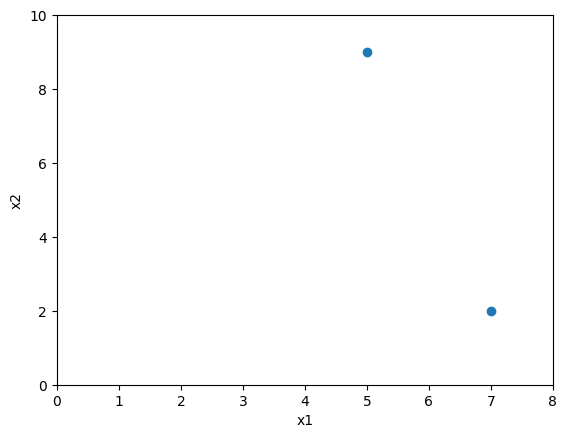

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# dos características por documento: (x1, x2) 
doc1=[5, 9]
doc2=[7, 2]
docs = [doc1, doc2]

x1 = [d[0] for d in docs]
x2 = [d[1] for d in docs]

fig, axis = plt.subplots()
axis.set_xlabel("x1")
axis.set_ylabel("x2")
axis.set_xlim(0, max(x1) + 1)
axis.set_ylim(0, max(x2) + 1)
axis.scatter(x1, x2)
plt.show()

## Documentos representados como vectores
- #### Se puede operar sobre los vectores. 
- #### Por ejemplo, calcular la similitud entre los Documentos A y B, por medio de la similitud coseno


# $$ cosine(\theta) = \frac{\vec{A} \cdot \vec{B}}{\lVert \vec{A} \rVert \lVert \vec{B} \rVert} =   \frac{ \sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}} $$

## Modelado del Copus de documentos
- ### cada renglón representa un documento

In [20]:
docs = [
"El cielo es azul",
"El sol es brillante",
"El sol en el cielo es brillante",
"Podemos ver el sol brillante, el sol brillante",
"Juan Luis ama a maria",
"Maria ama a Luis",
"la estrella de la mañana y la estrella del atardecer es la misma estrella",
"El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]

# Extracción de vocabulario¶

In [21]:
# vocabulario
palabras=[]

for d in docs:
    for t in d.split():
        palabras.append(t.lower())
# Generación del vocabulario único
vocabulario=list(sorted(set(palabras)))

print("tokens:",len(palabras))
print("tokens únicos:", len(vocabulario))
vocabulario

tokens: 73
tokens únicos: 35


['a',
 'al',
 'alba',
 'ama',
 'amanecer.',
 'atardecer',
 'atardecer.',
 'azul',
 'brillante',
 'brillante,',
 'cielo',
 'cuando',
 'de',
 'del',
 'el',
 'en',
 'es',
 'estrella',
 'firmamento',
 'juan',
 'la',
 'le',
 'llama',
 'lucero',
 'luis',
 'maria',
 'mañana',
 'misma',
 'podemos',
 'se',
 'sol',
 'tarde',
 'ver',
 'visible',
 'y']

# 1.5 Construcción de la matriz Documento-Término

In [22]:
import numpy as np
# Construcción de la matriz Documento-Término (num_documentos x tamaño_vocabulario)
# Pesado o ponderación de acuerdo a su frecuencia de aparición del término
vsm =  np.zeros((len(docs), len(vocabulario)), dtype=float)
for k, d in enumerate(docs):
    for t in d.lower().split():
        i = vocabulario.index(t)
        vsm[k, i] += 1

In [23]:
#Forma de la matriz resultante
vsm.shape

(8, 35)

### Visualización de los documentos en su representación vectorial 

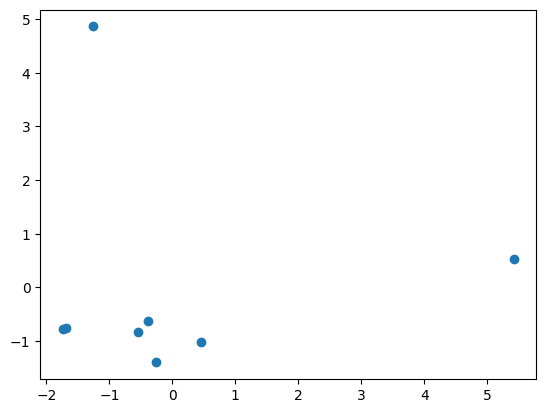

In [24]:
from sklearn.decomposition import PCA
# Análisis de componentes principales

pca = PCA(n_components=2)
two_dim = pca.fit_transform(vsm)
scatter_x = two_dim[:, 0] # primera componente principal
scatter_y = two_dim[:, 1] # segunda componente principal
plt.scatter(scatter_x, scatter_y)
plt.show()

### Ejemplo del cálculo de la similitud entre dos documentos con la similitud coseno

#### $ similitud\_coseno(\theta) = \frac{\vec{A} \cdot \vec{B}}{\lVert \vec{A} \rVert \lVert \vec{B} \rVert} =   \frac{ \sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}} $

In [25]:
import numpy as np

def print_texto(v):
    # obtiene los índices de las palabras presentes en el vector
    indices = np.flatnonzero(v>0)
    for i in indices:
        print(vocabulario[i], end=" ")
    print()

def similitud_coseno(a, b):
    return np.sum(a*b)/(np.sqrt(np.sum(np.power(a, 2))) * np.sqrt(np.sum(np.power(b, 2))))

a = vsm[1]
b = vsm[2]

print(similitud_coseno(a,b))

print_texto(a)
print_texto(b)



0.8333333333333334
brillante el es sol 
brillante cielo el en es sol 


# 1.6 Pesado de los términos según su importancia
- #### TF: Term Frequency
- #### TF-IDF: Term Frequency-Inverse Document Frecuency

### Pesado TF: Term Frequency (Frecuencia del Término)


### sklearn: CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()

#Ajusta el modelo con pesado TF, se obtiene la matriz Documento-Término
X = vec.fit_transform(docs)


# Features o Componentes o Términos de la matriz 
print(vec.get_feature_names_out())

#Tamaño del vocabulario
print("vocabulario: ", len(vec.get_feature_names_out()))

# Matriz  Documento-Término
print(X.toarray())




['al' 'alba' 'ama' 'amanecer' 'atardecer' 'azul' 'brillante' 'cielo'
 'cuando' 'de' 'del' 'el' 'en' 'es' 'estrella' 'firmamento' 'juan' 'la'
 'le' 'llama' 'lucero' 'luis' 'maria' 'mañana' 'misma' 'podemos' 'se'
 'sol' 'tarde' 'ver' 'visible']
vocabulario:  31
[[0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 1 0 0 1 3 0 0 4 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [2 1 0 1 1 0 0 1 1 1 1 4 2 2 0 1 0 1 1 1 2 0 0 0 0 0 1 0 1 0 2]]


### Personalizando la construcción de la matriz Documento-Término 

### Unigramas y bigramas

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
    
# usar unigramas y bigramas como features:  ngram_range=(1,2)

vec = CountVectorizer(analyzer="word", ngram_range=(1,2))
X = vec.fit_transform(docs)
print(vec.get_feature_names_out())
print(X.toarray())
print("vocabulario: ", len(vec.get_feature_names_out()))


['al' 'al amanecer' 'al atardecer' 'alba' 'alba se' 'ama' 'ama luis'
 'ama maria' 'amanecer' 'amanecer el' 'atardecer' 'atardecer es' 'azul'
 'brillante' 'brillante el' 'cielo' 'cielo al' 'cielo es' 'cuando'
 'cuando es' 'de' 'de la' 'del' 'del alba' 'del atardecer' 'el' 'el cielo'
 'el firmamento' 'el lucero' 'el sol' 'en' 'en el' 'es' 'es azul'
 'es brillante' 'es la' 'es visible' 'estrella' 'estrella de'
 'estrella del' 'firmamento' 'firmamento al' 'juan' 'juan luis' 'la'
 'la estrella' 'la mañana' 'la misma' 'la tarde' 'le' 'le llama' 'llama'
 'llama cuando' 'lucero' 'lucero de' 'lucero del' 'luis' 'luis ama'
 'maria' 'maria ama' 'mañana' 'mañana la' 'misma' 'misma estrella'
 'podemos' 'podemos ver' 'se' 'se le' 'sol' 'sol brillante' 'sol en'
 'sol es' 'tarde' 'tarde es' 'ver' 'ver el' 'visible' 'visible en']
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 0 0 0 0 

### Usar un preprocesamiento de datos personalizado

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

docs = [
"El cielo es azul 5342534523534 !!!!!?????????!",
"El sol es brillante  ?????!!!!!!",
"El sol en el cielo es brillante",
"Podemos ver el sol brillante, el sol brillante",
"JUAN LUIS,  ama MARíA !!!!!",
"María ama a Luis",
"la estrella de la mañana y la estrella del atardecer es la misma estrella",
" El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]


# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    #convierte a minúsculas el texto antes de normalizar
    print("antes: ", texto)
    texto = normaliza_texto(texto.lower())
    print("después:",texto)
    return texto
    
vec = CountVectorizer(analyzer="word", preprocessor=mi_preprocesamiento,  ngram_range=(1,1))
X = vec.fit_transform(docs)
print(vec.get_feature_names_out())
print(X.toarray())
print("vocabulario: ", len(vec.get_feature_names_out()))


antes:  El cielo es azul 5342534523534 !!!!!?????????!
después: el cielo es azul
antes:  El sol es brillante  ?????!!!!!!
después: el sol es brillante
antes:  El sol en el cielo es brillante
después: el sol en el cielo es brillante
antes:  Podemos ver el sol brillante, el sol brillante
después: podemos ver el sol brillante el sol brillante
antes:  JUAN LUIS,  ama MARíA !!!!!
después: juan luis ama maria
antes:  María ama a Luis
después: maria ama a luis
antes:  la estrella de la mañana y la estrella del atardecer es la misma estrella
después: la estrella de la manana y la estrella del atardecer es la misma estrella
antes:   El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer.
después: el lucero del alba se le llama cuando es visible en el cielo al amanecer el lucero de la tarde es visible en el firmamento al atardecer
['al' 'alba' 'ama' 'amanecer' 'atardecer' 'azul' 'brillante' 'cielo'
 'cuando' 'de' '

# Pesado TF-IDF: Term Frequency-Inverse Document Frequency

- #### Es una técnica utilizada para evaluar la relevancia de una palabra dentro de un documento en relación con un conjunto de documentos (corpus). Combina dos conceptos:

    - ##### TF (Frecuencia de Término): Mide cuántas veces aparece una palabra en un documento, ponderando la importancia de palabras más frecuentes.
    - ##### IDF (Frecuencia Inversa de Documentos): Penaliza las palabras que aparecen en muchos documentos del corpus, dando más peso a las que son más raras o específicas.
    - ##### El resultado es un valor que refleja la importancia de una palabra dentro de un documento, disminuyendo el peso de las palabras comunes y realzando las más distintivas. Es útil para tareas como clasificación de texto, búsqueda de información y extracción de características.



$$TF-IDF(t,d) = TF(t,d) * IDF(t)$$
$$TF(t,d) = f_{(t,d)}$$

$$IDF(t)= \log \frac {N}{d_t + 1}  $$

$$ N:  total\ de\ documentos $$ 
$$ d_t:  número\ de\ documentos \ donde \ aparece \ el \ término \ t $$ 

### sklearn: TfidfVectorizer

In [34]:
docs = [
"El cielo es azul 5342534523534 !!!!!?????????!",
"El sol es brillante  ?????!!!!!!",
"El sol en el cielo es brillante",
"Podemos ver el sol brillante, el sol brillante",
"JUAN LUIS,  ama MARíA !!!!!",
"María ama a Luis",
"la estrella de la mañana y la estrella del atardecer es la misma estrella",
" El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]


from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    #convierte a minúsculas el texto antes de normalizar
    print("antes: ", texto)
    texto = normaliza_texto(texto.lower())
    print("después:",texto)
    return texto
    
    

vec_tfidf = TfidfVectorizer(analyzer="word", preprocessor=mi_preprocesamiento,  ngram_range=(1,1))
X_tfidf = vec_tfidf.fit_transform(docs)
print(vec_tfidf.get_feature_names_out())
print(X_tfidf.toarray())

antes:  El cielo es azul 5342534523534 !!!!!?????????!
después: el cielo es azul
antes:  El sol es brillante  ?????!!!!!!
después: el sol es brillante
antes:  El sol en el cielo es brillante
después: el sol en el cielo es brillante
antes:  Podemos ver el sol brillante, el sol brillante
después: podemos ver el sol brillante el sol brillante
antes:  JUAN LUIS,  ama MARíA !!!!!
después: juan luis ama maria
antes:  María ama a Luis
después: maria ama a luis
antes:  la estrella de la mañana y la estrella del atardecer es la misma estrella
después: la estrella de la manana y la estrella del atardecer es la misma estrella
antes:   El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer.
después: el lucero del alba se le llama cuando es visible en el cielo al amanecer el lucero de la tarde es visible en el firmamento al atardecer
['al' 'alba' 'ama' 'amanecer' 'atardecer' 'azul' 'brillante' 'cielo'
 'cuando' 'de' '

# Ejercicio:
 - ### Obtener la matriz Documento-Término del archivo text_3.json
 - ### Mejorar el preprocesamiento del texto: convertir a minúsculas, separar las oraciones, normalizar el texto, y separar los tokens adecuadamente


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    print("antes: ", texto)

    #TODO: Mejorar el preprocesamiento, convertir a minúsculas, separar las oraciones, normalizar el texto, y separar los tokens



    print("después:",texto)
    return texto
    
# Tokenizador personalizado 


vec_tfidf = TfidfVectorizer(analyzer="word", preprocessor=mi_preprocesamiento, ngram_range=(1,1))
X_tfidf = vec_tfidf.fit_transform(docs)
print(vec_tfidf.get_feature_names_out())
print("vocabulario: ", len(vec_tfidf.get_feature_names_out()))


antes:  El cielo es azul 5342534523534 !!!!!?????????!
después: El cielo es azul 5342534523534 !!!!!?????????!
antes:  El sol es brillante  ?????!!!!!!
después: El sol es brillante  ?????!!!!!!
antes:  El sol en el cielo es brillante
después: El sol en el cielo es brillante
antes:  Podemos ver el sol brillante, el sol brillante
después: Podemos ver el sol brillante, el sol brillante
antes:  JUAN LUIS,  ama MARíA !!!!!
después: JUAN LUIS,  ama MARíA !!!!!
antes:  María ama a Luis
después: María ama a Luis
antes:  la estrella de la mañana y la estrella del atardecer es la misma estrella
después: la estrella de la mañana y la estrella del atardecer es la misma estrella
antes:   El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer.
después:  El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer.
['5342534523534' 'El' 'JUAN' '

# 1.7 Técnicas para reducir las características (**features**) textuales
#### - **Stemming**.  Corta los finales de las palabras de acuerdo a un conjunto de reglas
#### - **Lematización**. Reducir a la forma normal de la palabra, es decir, verbos a infinitivo; adjetivos a masculino, singular;  sustantivos a singular.
#### - **Remover StopWords**. Eliminar palabras que no se consideran de contenido, es decir, que no aportan a la semántica como preposiciones: a, ante, de, desde, etc.; conjunciones entre otras.


# Stemming

### - El stemming es el proceso de reducir las palabras a su raíz o base sin considerar su contexto gramatical.
### - A menudo, la raíz obtenida no es una palabra real, pero es útil para tareas de procesamiento de lenguaje natural.
### - Algoritmos populares de stemming incluyen el **algoritmo de Porter** y el **algoritmo de Snowball**.
### - Herramientas como **NLTK** incluyen implementaciones de estos algoritmos para varios idiomas.
### - A diferencia de la lematización, el stemming es más rápido pero menos preciso.


In [31]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("spanish")
print(stemmer.stem("mesas"))
print(stemmer.stem("mesa"))

mes
mes


# Lematización 

### - La lematización es el proceso de reducir las palabras a su forma base o "lema", considerando su contexto gramatical.
### - A diferencia del stemming, la lematización analiza la estructura lingüística para obtener una forma más precisa.
### - Ejemplo: "corriendo" y "corrió" se reducen a "correr" (verbo en infinitivo).
### - Herramientas como **spaCy** ofrecen lematización en varios idiomas.
### - **NLTK** y **TextBlob** también permiten realizar lematización.
### - **spaCy** es reconocido por su eficiencia y precisión al considerar el contexto gramatical.


###  Instalación de los modelos de spacy

In [32]:
!python -m spacy download es_core_news_md
#!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 4.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [33]:
import spacy
from spacy.lang.es.examples import sentences 

nlp = spacy.load("es_core_news_md")
doc = nlp("me comí unas galletas con mis amigos, pero después Juan se comió la última que quedaba")
print(doc.text)
print("="*20)


for token in doc:
    #print(token.text, token.pos_, token.dep_, token.lemma_)
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.is_stop)

me comí unas galletas con mis amigos, pero después Juan se comió la última que quedaba
me yo PRON PRON iobj True
comí comer VERB VERB ROOT False
unas uno DET DET det True
galletas galleta NOUN NOUN obj False
con con ADP ADP case True
mis mi DET DET det True
amigos amigo NOUN NOUN obl False
, , PUNCT PUNCT punct False
pero pero CCONJ CCONJ cc True
después después ADV ADV advmod True
Juan Juan PROPN PROPN nsubj False
se él PRON PRON iobj True
comió comer VERB VERB conj False
la el DET DET det True
última último ADJ ADJ punct True
que que PRON PRON nsubj True
quedaba quedar VERB VERB acl False


### Stopwords
- #### Las **stopwords** son palabras muy comunes en un idioma que suelen tener poco valor semántico o informativo en el análisis de texto. 
- #### En español, incluyen incluyen artículos, preposiciones y pronombres como  "el", "la", "de", "y", "que", "es", entre otros. 
- #### Estas palabras suelen eliminarse para reducir el ruido, se eliminan durante el preprocesamiento de texto para centrarse en términos más relevantes, facilitando tareas como la clasificación,  análisis de sentimientos, búsqueda y minería de texto.
- #### Herramientas como **NLTK**, **spaCy** y **scikit-learn** ofrecen listas predeterminadas de stopwords.
- #### Las stopwords se adaptan al idioma y a la tarea, por lo que a veces es útil personalizar la lista según el contexto del problema.


## Descarga de las listas de stopwords

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import nltk
from nltk.corpus import stopwords

_STOPWORDS = stopwords.words("spanish")  # agregar más palabras a esta lista si es necesario

print(_STOPWORDS)

In [ ]:
docs = [
"El cielo es azul,  5342534523534 !!!!!?????????!",
"El sol es,brillante  ?????!!!!!!",
"El sol en el, cielo,es muy  brillante",
"Podemos ver el sol brillante, el sol brillante",
"JUAN LUIS,  ama MARíA !!!!!",
"María ama a Luis",
"la estrella de la mañana y la estrella del atardecer es la misma estrella",
" El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

_STOPWORDS = stopwords.words("spanish")  # agregar más palabras a esta lista si es necesario


# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    #convierte a minúsculas el texto antes de normalizar
    tokens = word_tokenize(texto.lower())
    texto = " ".join(tokens)
    texto = normaliza_texto(texto)
    return texto
    
# Tokenizador personalizado 
def mi_tokenizador(texto):
    # Elimina stopwords: palabras que no se consideran de contenido y que no agregan valor semántico al texto
    print("antes: ", texto)
    texto = [t for t in texto.split() if t not in _STOPWORDS]

    print("despues:",texto)
    
    return texto


vec_tfidf = TfidfVectorizer(analyzer="word", preprocessor=mi_preprocesamiento, tokenizer=mi_tokenizador,  ngram_range=(1,1))
X_tfidf = vec_tfidf.fit_transform(docs)
print(vec_tfidf.get_feature_names_out())
print("vocabulario: ", len(vec_tfidf.get_feature_names_out()))
print(X_tfidf.toarray())

## Convertir los ejemplos de prueba al mismo espacio de representación de datos del conjunto de entrenamiento que aprendió el modelo de texto

In [34]:
doc_test = [
"El sol es muy brillante el día de hoy",
"Podemos ver el cielo azul",
"JUAN LUIS   se fue de paseo",
]

In [ ]:
# El método transform convierte la entrada al espacio de representación del texto modelado con los datos de entrenamiento
doc_test_tfidf = vec_tfidf.transform(doc_test)
print(doc_test_tfidf)

### Inspección de los datos transformados

In [ ]:
print("tamaño de la matriz de prueba: (ejemplos, tamaño de features) ", doc_test_tfidf.shape)
n_sample=0
print("\ntexto original: ")
print(doc_test[n_sample])
#type(vec_tfidf.inverse_transform(X_test_tfidf[n_sample]))

print("\ntexto del espacio de representación: ")
print(" ".join(vec_tfidf.inverse_transform(doc_test_tfidf[n_sample])[0].tolist()))


# <font color="white">Preparación de los conjuntos de datos para el entrenamiento y evaluación</font>


# 1.1 Cargar el conjunto de datos

In [ ]:
import pandas as pd
# Lee el archivo de datos: el formato es una linea es un ejemplo de entrenamiento.
dataset = pd.read_json("./data/data_emotions_es.json", lines=True)


#conteo de clases
print("Total de ejemplos de entrenamiento")

#primeros 30 textos
print(dataset["text"].to_list()[:30])

print(dataset.klass.value_counts())

# Extracción de los textos en arreglos de numpy
X = dataset['text'].to_numpy()

# Extracción de las etiquetas o clases de entrenamiento

Y = dataset['klass'].to_numpy()


# Codificar las categorías utilizando un esquema de codificación ordinal.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Normalizar las etiquetas a una codificación ordinal para entrada del clasificador
Y_encoded= le.fit_transform(Y)

print("Clases codificadas:")
print(le.classes_)


print("Clases codificadas:")
print(Y[:3], Y_encoded[:3])


### Decodificar las categorías en  codificación ordinal a la categoría original.

In [ ]:
# Arreglo con  resultados de las clases en la categoría codificada. 
le.inverse_transform([0, 0 , 1, 2, 3, 3])

## 1.2 Preparación de los conjuntos de datos  (datasets)

## Hay  dos formas principales de evaluación de modelos: partición y validación cruzada:

### 1. **Evaluación por partición (separación de datasets en train-test)**:
   - #### Dividir el conjunto de datos en dos subconjuntos: uno para entrenar (train) y otro para probar (test).
   - #### Proceso simple y rápido, adecuado para conjuntos de datos grandes.
   - #### Riesgo de que la evaluación dependa de cómo se haya dividido el conjunto, lo que puede generar un rendimiento sesgado.
   - #### Se utiliza un porcentaje fijo de datos para entrenar y el resto para evaluar, como 70%/30% o 80%/20%.
   
### 2. **Evaluación por validación cruzada**:
   - #### El conjunto de datos se divide en múltiples subconjuntos (folds) y se entrena el modelo varias veces, usando cada fold como conjunto de prueba y el resto como entrenamiento.
   - #### Más robusta y fiable, ya que la evaluación se basa en múltiples particiones, lo que reduce el sesgo.
   - #### Ayuda a obtener una estimación más precisa del rendimiento del modelo en datos no vistos.
   - #### La variante más común es la **k-fold cross-validation**, donde los datos se dividen en *k* subconjuntos.


      <img src="figs/fig_cross-validation.jpg" width="800">


###### Fuente: https://es.wikipedia.org/wiki/Validación_cruzada

### **Ambos métodos tienen ventajas y desventajas, siendo la validación cruzada más precisa pero costosa en términos computacionales.**



In [225]:
# Dividir el conjunto de datos en conjunto de entrenamiento (80%) y conjunto de pruebas (20%)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y_encoded, test_size=0.2, stratify= Y_encoded, random_state=42)

In [ ]:
#Mostrar los primeros N ejemplos con sus clases
samples=10
X_train[:samples], Y_train[:samples], le.inverse_transform(Y_train[:samples]), len(X_train), len(X_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
muestras = 100
X_cv, y_cv = np.ones((muestras, 1)), np.hstack(([0] * int(muestras * .7), [1] * int(muestras * .3)))
print(len(X_cv), len(y_cv))

skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X_cv, y_cv):
    #cuenta el número de ocurrencias de cada valor
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y_cv[train]), np.bincount(y_cv[test])))
    
    # Entrenar y evaluar el modelo, al final obtener la media de las métricas



In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
muestras = 100

s = 50
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X, Y_encoded):
    #cuenta el número de ocurrencias de cada valor
    print('train -  {}   |   test -  {}'.format(
        np.bincount(Y_encoded[train]), np.bincount(Y_encoded[test])))
    print(train[:s], test[:s])
    print(X[train[:s]])
    print(Y_encoded[test[:s]])

# <font color="white">Ejercicio: </font>


###  1. Preprocesar los datos para la creación de la matriz de documento-término, usar un pesado TF-IDF, y unigramas

###  2. Preparar los conjuntos de datos para el entrenamiento con un partición train-test: dividir 70% para entrenamiento y 30% para test


In [ ]:
# TODO: cargar el conjunto de datos "data_emotions_es.json" 


# TODO: Codificar las clases si no son categorías ordinales.


# TODO: Separar los datos 70% entrenamiento y 30% test


# TODO: Preprocesar los datos: convertir a minúsculas, borrar puntuación, etc.


# TODO: Contruir la matriz de documento-término  para el conjunto de entrenamiento y para el conjunto de test 



## 